In [1]:
# This Project is a continuation of a previous project that I have done
# This is a project about What Makes a good F1 Race?

# Let's start by importing what we need

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from os import listdir
from os.path import isfile, join
import seaborn as sns

In [2]:
dataset_folder_path = 'Data/'

circuits = pd.read_csv(dataset_folder_path + "circuits.csv")
drivers = pd.read_csv(dataset_folder_path + "drivers.csv")
laptimes = pd.read_csv(dataset_folder_path + "lap_times.csv")
races = pd.read_csv(dataset_folder_path + "races.csv")
results = pd.read_csv(dataset_folder_path + "results.csv")
status = pd.read_csv(dataset_folder_path + "status.csv")
top_100_df = pd.read_csv(dataset_folder_path + "top_100_races_f1.csv")



In [3]:
circuits

,circuitId,circuitRef,name,location,country,lat,lng,alt
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130
...,...,...,...,...,...,...,...,...
72,75,portimao,Autódromo Internacional do Algarve,Portimão,Portugal,37.22700,-8.62670,108
73,76,mugello,Autodromo Internazionale del Mugello,Mugello,Italy,43.99750,11.37190,255
74,77,jeddah,Jeddah Corniche Circuit,Jeddah,Saudi Arabia,21.63190,39.10440,15
75,78,losail,Losail International Circuit,Al Daayen,Qatar,25.49000,51.45420,12


In [4]:
type_top_100_df = {
    "Ranking": str,
    "raceId": int,
    "circuitId": int,
    "name": str,
    "rating": float,
    "year": int
}
top_100_df = top_100_df.astype(type_top_100_df, errors="ignore")
top_100_df.dropna(how="any", inplace=True)
top_100_df

,Ranking,raceId,circuitId,name,rating,year
0,1,879,18,Brazilian Grand Prix,9.45,2012
1,2,1020,10,German Grand Prix,9.44,2019
2,3,843,17,Chinese Grand Prix,9.24,2011
3,4,906,7,Canadian Grand Prix,9.19,2014
4,5,910,11,Hungarian Grand Prix,9.14,2014
...,...,...,...,...,...,...
95,96,855,22,Japanese Grand Prix,7.57,2011
96,97,975,7,Canadian Grand Prix,7.55,2017
97,98,353,35,South Korean Grand Prix,7.54,2010
98,99,970,17,Chinese Grand Prix,7.53,2017


In [5]:
top_100_circuits = pd.merge(top_100_df, circuits, on="circuitId", how="left")
top_100_circuits = top_100_circuits.drop(['lat', 'lng', 'alt', 'name_x'], axis=1)
top_100_circuits = top_100_circuits.rename(columns={'name_y': 'name'})
top_100_circuits

,Ranking,raceId,circuitId,rating,year,circuitRef,name,location,country
0,1,879,18,9.45,2012,interlagos,Autódromo José Carlos Pace,São Paulo,Brazil
1,2,1020,10,9.44,2019,hockenheimring,Hockenheimring,Hockenheim,Germany
2,3,843,17,9.24,2011,shanghai,Shanghai International Circuit,Shanghai,China
3,4,906,7,9.19,2014,villeneuve,Circuit Gilles Villeneuve,Montreal,Canada
4,5,910,11,9.14,2014,hungaroring,Hungaroring,Budapest,Hungary
...,...,...,...,...,...,...,...,...,...
95,96,855,22,7.57,2011,suzuka,Suzuka Circuit,Suzuka,Japan
96,97,975,7,7.55,2017,villeneuve,Circuit Gilles Villeneuve,Montreal,Canada
97,98,353,35,7.54,2010,yeongam,Korean International Circuit,Yeongam County,Korea
98,99,970,17,7.53,2017,shanghai,Shanghai International Circuit,Shanghai,China


In [6]:
# From Previous Project; Show the count of circuits with it's average race rating

race_ratings_2022_2021_2019 = pd.read_csv(dataset_folder_path + "All_Races_Ratings.csv")
race_ratings_2022_2021_2019

,raceId,circuitId,name,rating,year
0,1094,32,Mexican Grand Prix,3.90,2022
1,1081,73,Azerbaijan Grand Prix,5.03,2022
2,1089,14,Italian Grand Prix,5.28,2022
3,1092,22,Japanese Grand Prix,5.44,2022
4,1078,79,Miami Grand Prix,5.63,2022
...,...,...,...,...,...
59,1011,3,Bahrain Grand Prix,8.50,2019
60,1019,9,British Grand Prix,8.60,2019
61,1029,18,Brazilian Grand Prix,8.80,2019
62,1018,70,Austrian Grand Prix,8.90,2019


In [7]:
#Race Ratings Data Frame
#Concat top 100 and race ratings from 2022, 2021, and 2019
#merge top 100 
race_ratings = pd.concat([top_100_df, race_ratings_2022_2021_2019])
race_ratings = race_ratings.drop_duplicates(subset='raceId')
race_ratings = race_ratings.drop(['Ranking'], axis=1)
race_ratings = pd.merge(race_ratings, circuits, on="circuitId", how="left")
race_ratings = race_ratings.drop(['lat', 'lng', 'alt'], axis=1)
race_ratings = race_ratings.rename(
    columns={
        'name_x': 'Grand Prix',
        'name_y': 'Circuit Name',
        'rating': 'Race Rating',
        'year': 'Year',
        'location': 'Location',
        'country': 'Country'
            })
race_ratings.sort_values(by="Race Rating", ascending=False, inplace=True)
race_ratings

,raceId,circuitId,Grand Prix,Race Rating,Year,circuitRef,Circuit Name,Location,Country
0,879,18,Brazilian Grand Prix,9.45,2012,interlagos,Autódromo José Carlos Pace,São Paulo,Brazil
1,1020,10,German Grand Prix,9.44,2019,hockenheimring,Hockenheimring,Hockenheim,Germany
2,843,17,Chinese Grand Prix,9.24,2011,shanghai,Shanghai International Circuit,Shanghai,China
3,906,7,Canadian Grand Prix,9.19,2014,villeneuve,Circuit Gilles Villeneuve,Montreal,Canada
4,910,11,Hungarian Grand Prix,9.14,2014,hungaroring,Hungaroring,Budapest,Hungary
...,...,...,...,...,...,...,...,...,...
129,1016,7,Canadian Grand Prix,4.40,2019,villeneuve,Circuit Gilles Villeneuve,Montreal,Canada
116,1056,6,Monaco Grand Prix,4.00,2021,monaco,Circuit de Monaco,Monte-Carlo,Monaco
100,1094,32,Mexican Grand Prix,3.90,2022,rodriguez,Autódromo Hermanos Rodríguez,Mexico City,Mexico
128,1017,34,French Grand Prix,3.50,2019,ricard,Circuit Paul Ricard,Le Castellet,France


In [8]:
# Does circuit matter in relation to race rating?

race_ratings['NameOfCircuit'] = race_ratings.loc[:, 'Circuit Name']
circuit_rating = race_ratings.groupby(by=["NameOfCircuit", "Location", "Country"], as_index=False).aggregate(
    {
        "Circuit Name": 'count',
        "Race Rating": 'mean' 
    }
).rename(({"Circuit Name": "Circuit Count"}), axis = 1)

circuit_rating.sort_values(by="Circuit Count", ascending=False, inplace=True)
circuit_rating = circuit_rating[circuit_rating["Circuit Count"] > 1]
circuit_rating.sort_values(by="Race Rating", ascending=False, inplace=True)
circuit_rating

,NameOfCircuit,Location,Country,Circuit Count,Race Rating
5,Autódromo José Carlos Pace,São Paulo,Brazil,8,8.493750
15,Hockenheimring,Hockenheim,Germany,3,8.480000
6,Bahrain International Circuit,Sakhir,Bahrain,8,8.378750
16,Hungaroring,Budapest,Hungary,7,8.374286
14,Circuit of the Americas,Austin,USA,6,8.361667
11,Circuit de Barcelona-Catalunya,Montmeló,Spain,3,8.283333
25,Sepang International Circuit,Kuala Lumpur,Malaysia,4,8.152500
27,Silverstone Circuit,Silverstone,UK,8,8.050000
23,Nürburgring,Nürburg,Germany,2,8.035000
26,Shanghai International Circuit,Shanghai,China,7,7.860000


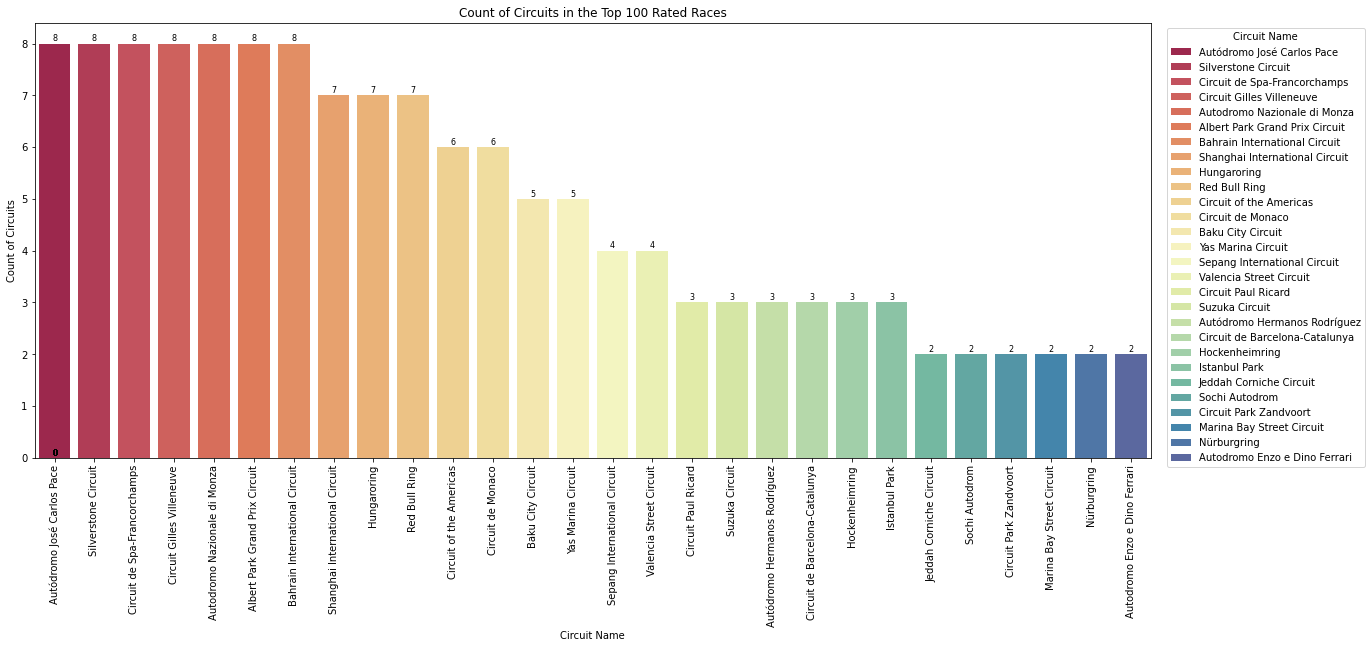

In [9]:
circuit_rating.sort_values(by="Circuit Count", ascending=False, inplace=True)
circuit_rating_sorted = circuit_rating

plt.figure(figsize=(20,8))
bars = sns.barplot(x='NameOfCircuit', y='Circuit Count', data=circuit_rating_sorted, hue='NameOfCircuit', legend='full', palette='Spectral')
plt.title("Count of Circuits in the Top 100 Rated Races")
plt.xlabel("Circuit Name")
plt.ylabel("Count of Circuits")
plt.xticks(rotation=90)

for p in bars.patches:
    bars.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=8, color='black')

plt.legend(title='Circuit Name', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()